In [81]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fft

In [82]:
class Run():
    threshold_=0.01
    def __init__(self, file_name, offset, Vmax, trigger):
         
         self.file_name=file_name
         self.offset=offset
         self.Vmax=Vmax
         self.trigger=trigger

         self.file=uproot.open(self.file_name)
         self.tree=self.file['tree']
         self.branches=self.tree.arrays()
         self.waveforms=np.array(self.branches['pshape']).reshape((max(self.branches['ev']),1024))
         self.baselines=np.array(self.branches['base']).ravel()
         self.charges=np.array(self.branches['charge']).ravel()
         self.amplitudes=np.array(self.branches['amp']).ravel()
         
    
        
      
    def baseline_measurement(self):
      i=0
      baseline=[]
      for i in range(len(self.branches['ev'])):
        baseline.append(np.mean(self.waveforms[i][:16]))
      return np.array(baseline)
        

    def amplitude_measurement(self):
      #amplitude=[]
      amplitude=[np.min(self.waveforms[i]) for i in range(max(self.branches['ev']))]
      return np.array(amplitude)-self.baseline_measurement()
       
    def charge_measurement(self):
       start=int(0.25*1024/16)
       stop=int(15.50*1024/16)
       charge=[np.trapz(self.waveforms[i][start:stop]-self.baselines[i]) for i in range(max(self.branches['ev']))]
       return np.array(charge)
                
    
    
def plot_hist(array, bins='Gaussian'):
  print(bins)
  mean=np.mean(array)
  std=np.std(array)
  if bins=='Gaussian':
     bins=[min(array), mean-2*std, mean-std, mean, mean+std, mean+2*std, max(array)]
  a=plt.hist(array, bins=bins, histtype='stepfilled')
  return a 



         

In [83]:
data=Run("../Dati/Run_ch0_Data_3_14_2024_Ascii.root", 0, 1800, -0.01) 
baseline_meas=data.baseline_measurement()
charge_meas=data.charge_measurement()
amplitude_meas=data.amplitudes

LinregressResult(slope=-2.871617548336375e-07, intercept=37.554653765444876, rvalue=-0.003856494250058643, pvalue=0.785139066480386, stderr=1.0532526366727412e-06, intercept_stderr=0.0030400223909673022)


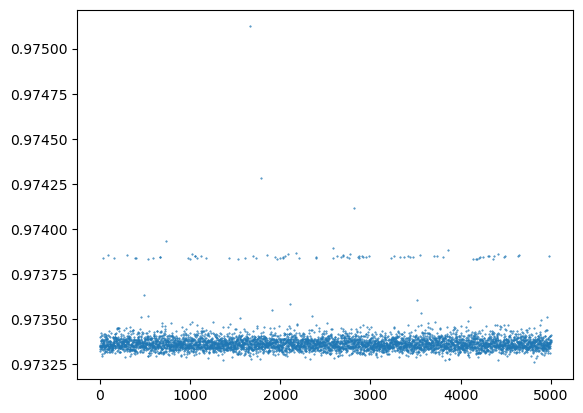

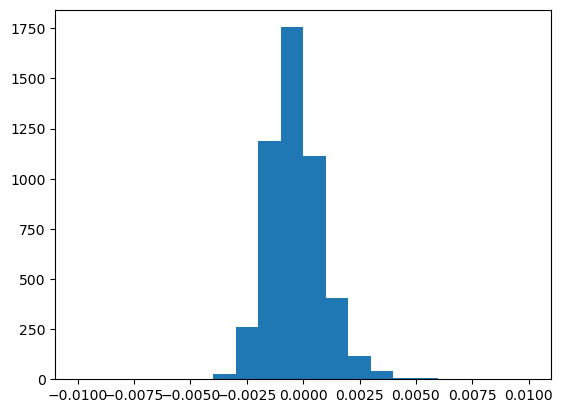

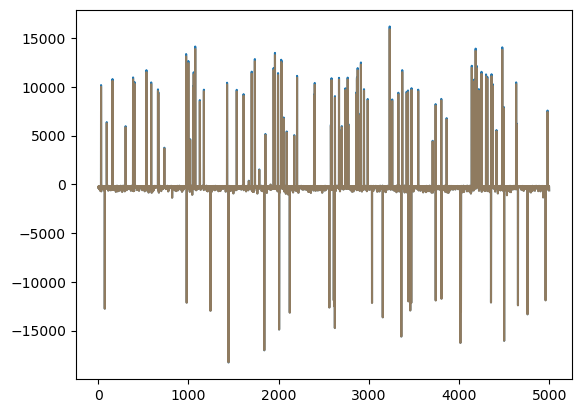

In [84]:
from scipy import stats
plt.plot((data.charges - charge_meas)/data.charges, '.', markersize=0.9)
z=stats.linregress(np.arange(5000),data.charges/charge_meas)
print(z)
#plt.plot(data.charges, '.', markersize=0.9)
#plt.ylim(-2500, 5000)
#plt.yscale("log")
#plt.plot((charge_meas-data.charges)/data.charges, '.', markersize=0.7)
#plt.plot(data.charges, '.')
plt.show()
plt.hist((data.charges-charge_meas*z[1])/data.charges, bins=20, range=(-0.01, 0.01))
plt.show()
plt.plot(data.charges)
plt.plot(charge_meas*z[1], alpha=0.5)

In [85]:
print(np.trapz(data.waveforms[10]-data.baselines[10]))
print(data.charges[10])
#index=[np.where(self.waveforms[i]==np.min(self.waveforms[i]))[0][0] for i in range(max(self.branches['ev']))]
print(index)
charge=[]
start=20
end=20
#baselines=self.baselines
       #charge=np.array([np.trapz(self.waveforms[i][index[i]-start: index[i]+end ]-self.baselines[i][index[i]-start: index[i]+end]) for i in range(max(self.branches['ev']))])
#charge=np.trapz(self.waveforms[i]-baselines[i] for i in range(max(self.branches['ev'])))

-6.0500154
-226.53


NameError: name 'index' is not defined

[ 2.16616464e+02  1.28470839e+01  1.34507712e+02 -4.05193413e-02]
{'fvec': array([ 0.001028  , -0.00019   , -0.000915  , ...,  0.00196955,
        0.00039531, -0.00077393]), 'nfev': 46, 'fjac': array([[-7.08642311e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.56709552e-04,  3.54067277e-04,  3.51444640e-04],
       [-1.04141964e-06, -6.97116985e-03,  0.00000000e+00, ...,
        -1.09295224e-04, -1.08485648e-04, -1.07682075e-04],
       [-3.33479915e-03, -3.12659437e-03, -3.32393490e-03, ...,
        -2.55069039e-04, -2.53179640e-04, -2.51304296e-04],
       [ 1.38594922e-03, -2.98541422e-04, -5.75952708e-04, ...,
        -4.60955666e-03, -4.58208894e-03, -4.55477501e-03]]), 'ipvt': array([4, 1, 2, 3], dtype=int32), 'qtf': array([-1.42385888e-08, -3.12280948e-09, -7.09845416e-06,  3.71112445e-06])}
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
1


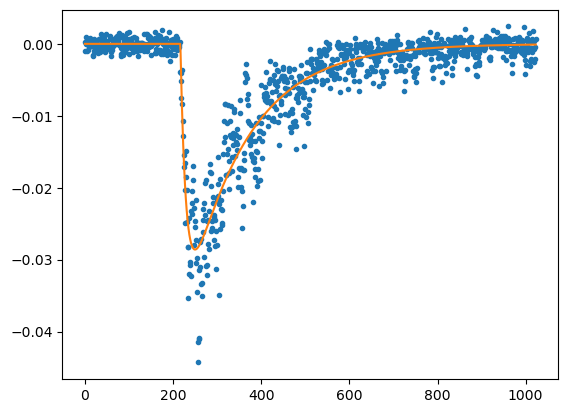

In [ ]:


def signal(t, t0, tr, td, amplitude):
  a=np.heaviside(t-t0, 1)*amplitude*( -np.exp(-(t-t0)/tr) +  np.exp(-(t-t0)/td)  )
  return a

sample=20
x=np.arange(1024)
y=data.waveforms[sample]
plt.plot(x, data.waveforms[sample], '.')


from scipy.optimize import curve_fit
params, covs, i, m, ier = curve_fit(signal, x, y, p0=[200, 30, 300, -0.05], full_output=True)
print(params)
print(i)
print(m)
print(ier)
#plt.plot(x, signal(x, 200, 30, 300, -0.05))
plt.plot(x, signal(x, params[0], params[1], params[2], params[3]))


# Plot sistemato per slides

-0.044301
257
-0.044276875 -0.044435


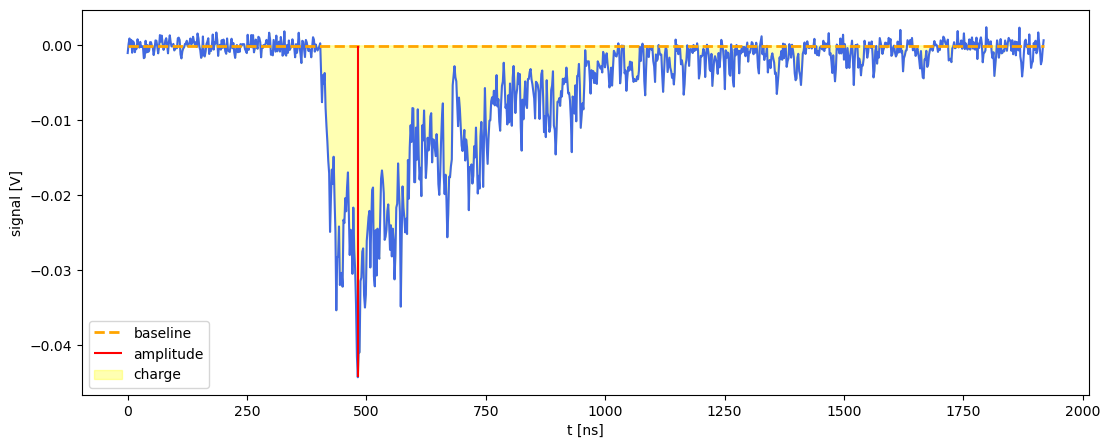

In [110]:
plt.figure(figsize=(13,5))
plt.plot(x*1.875, data.waveforms[sample], '-', color = 'royalblue')
#baseline plot
plt.plot(x*1.875, np.mean(data.waveforms[sample][:16])+ 0*x, '--',linewidth=2, color='orange', label='baseline')
print(np.min(data.waveforms[sample]))
print(np.argmin(data.waveforms[sample]))
plt.vlines(x=1.875*np.argmin(data.waveforms[sample]), ymin=np.min(data.waveforms[sample]), ymax=np.mean(data.waveforms[sample][:16]), linestyle='-', linewidth=1.5, color='red', label='amplitude')
#plt.arrow(1.875*np.argmin(data.waveforms[sample]), 0, 0, amplitude_meas[sample], head_width=25, head_length=0.001, color='red', label='amplitude', length_includes_head=True)
#plt.arrow(amplitude_meas[sample], 0, 0, 1.875*np.argmin(data.waveforms[sample]), head_width=25, head_length=0.001, color='limegreen', label='amplitude', length_includes_head=True)
print(np.min(data.waveforms[sample])-np.mean(data.waveforms[sample][:16]), amplitude_meas[sample])
#integral limits
lim_sx=int((0.25/16)*np.size(data.waveforms[sample]))
lim_dx=int((15.5/16)*np.size(data.waveforms[sample]))
plt.fill_between((x*1.875)[lim_sx:lim_dx], data.waveforms[sample][lim_sx:lim_dx], color='yellow', alpha=0.3, label='charge')
plt.xlabel('t [ns]')
plt.ylabel('signal [V]')
plt.legend()